In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/food-adulteration-dataset/food_adulteration_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   adulteration_id   1000 non-null   int64 
 1   product_name      1000 non-null   object
 2   brand             1000 non-null   object
 3   category          1000 non-null   object
 4   adulterant        1000 non-null   object
 5   detection_date    1000 non-null   object
 6   detection_method  1000 non-null   object
 7   severity          1000 non-null   object
 8   health_risk       1000 non-null   object
 9   action_taken      1000 non-null   object
dtypes: int64(1), object(9)
memory usage: 78.2+ KB


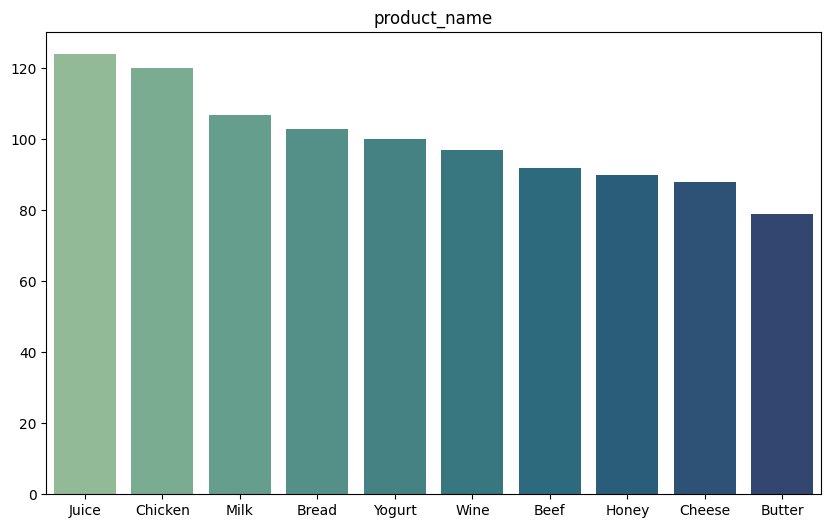

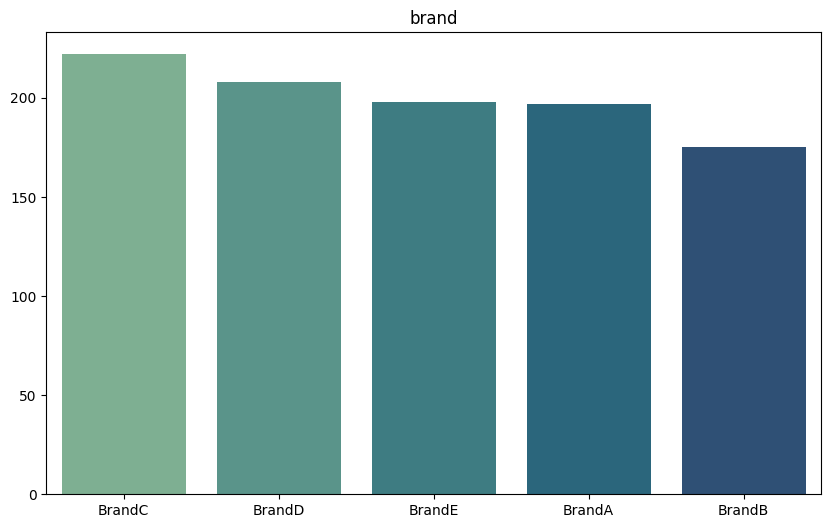

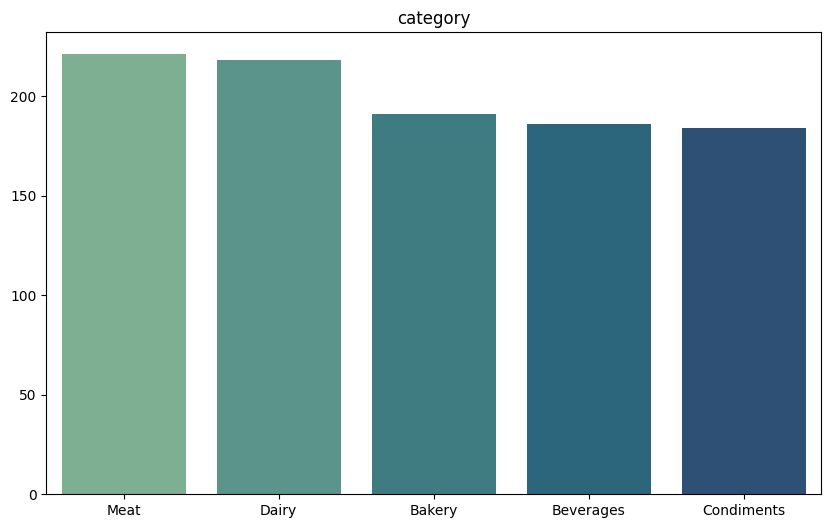

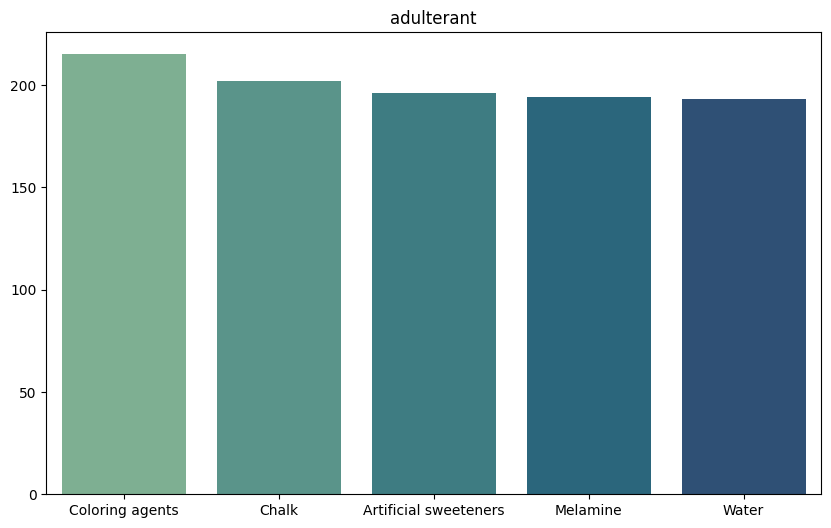

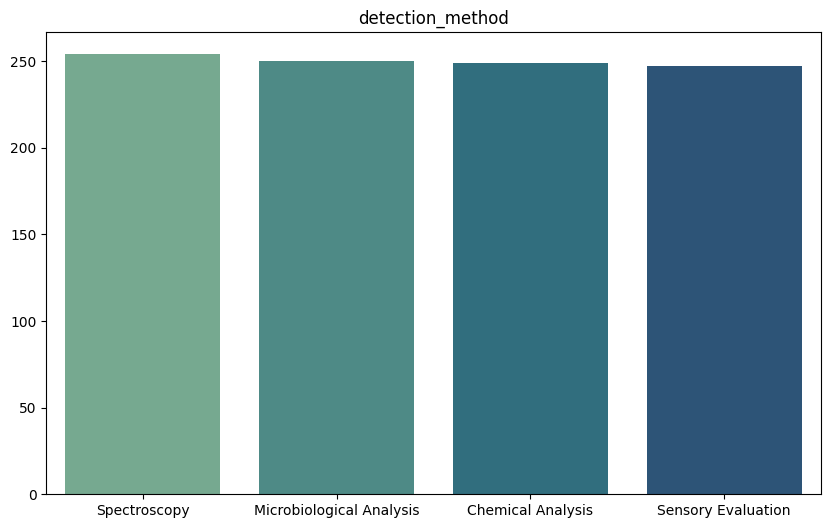

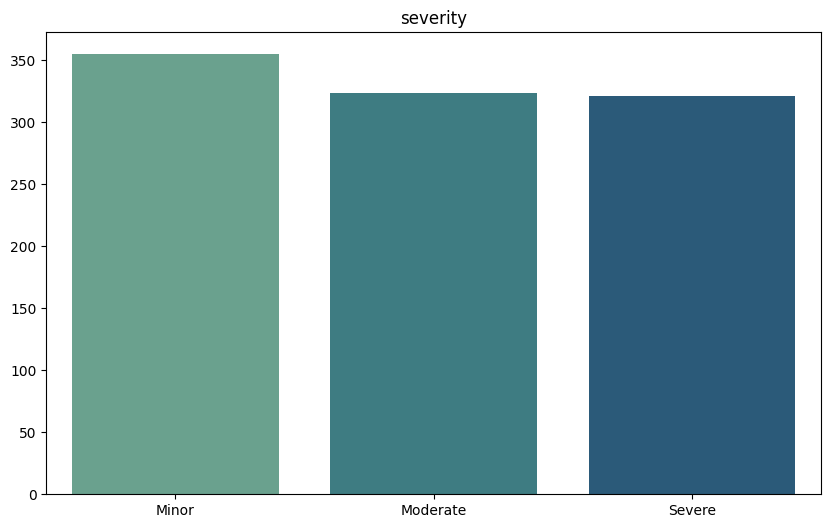

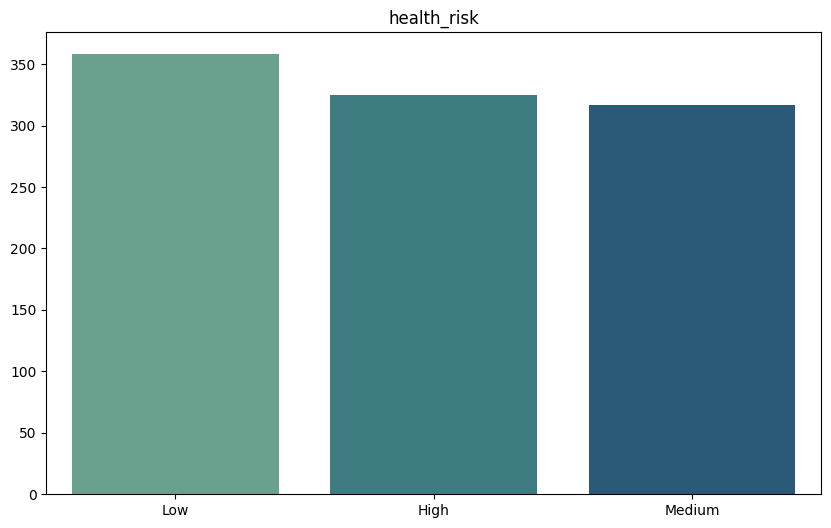

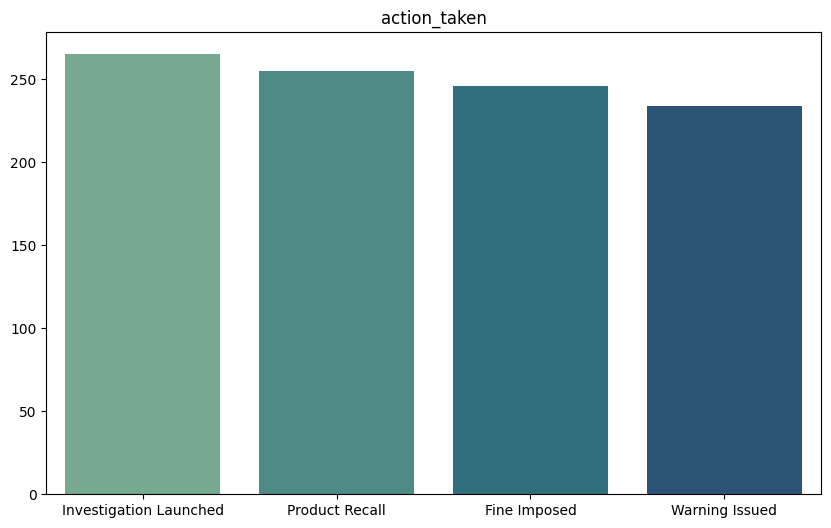

In [3]:
df.drop(columns=['adulteration_id', 'detection_date'], inplace=True)

for col in df.columns:
    data = df[col].value_counts().reset_index()
    plt.figure(figsize=(10,6))
    plt.title(col)
    sns.barplot(data=data, x=col, y='count', palette='crest')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [4]:
df.drop(columns = ['product_name', 'brand'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          1000 non-null   object
 1   adulterant        1000 non-null   object
 2   detection_method  1000 non-null   object
 3   severity          1000 non-null   object
 4   health_risk       1000 non-null   object
 5   action_taken      1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [5]:
def my_heatmap(title, data):
    plt.figure(figsize=(10,8))
    plt.title(title)
    sns.heatmap(data=data, annot=True, cmap='coolwarm')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(rotation=0)
    plt.show()

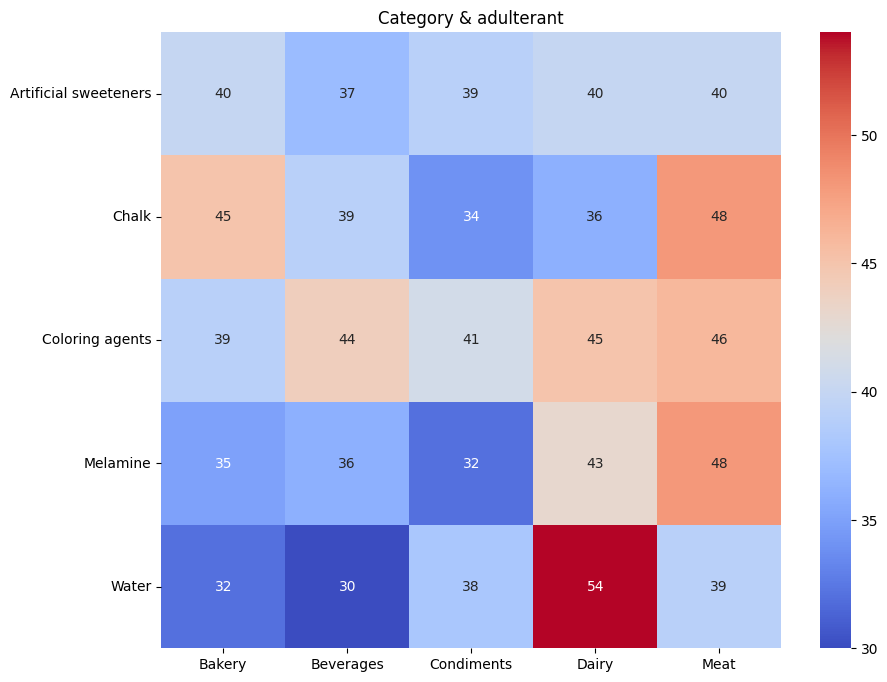

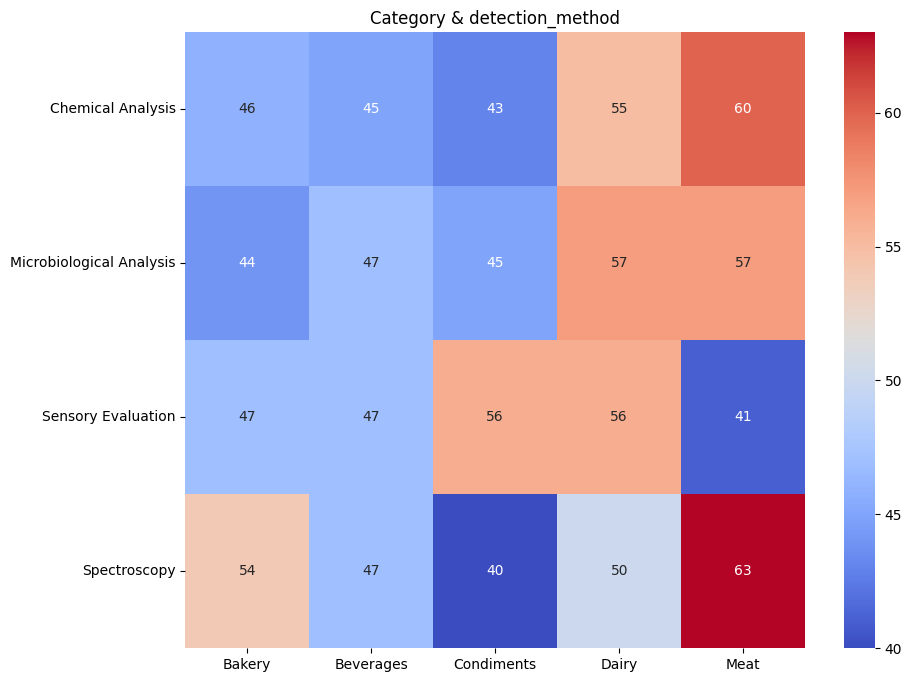

In [6]:
for col in ['adulterant', 'detection_method']:
    data = pd.crosstab(df[col], df['category'])
    my_heatmap(f'Category & {col}', data)

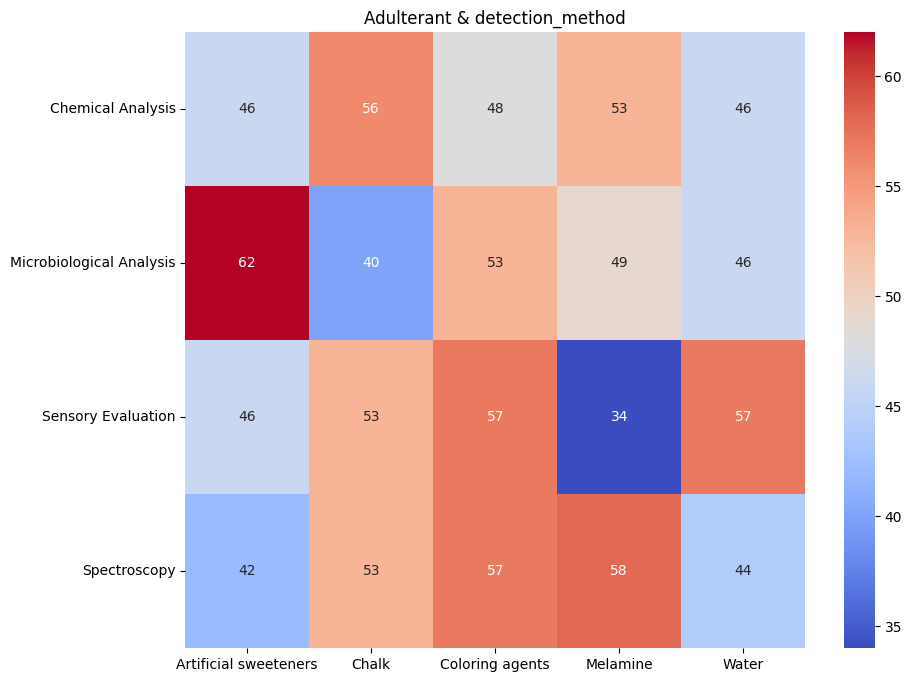

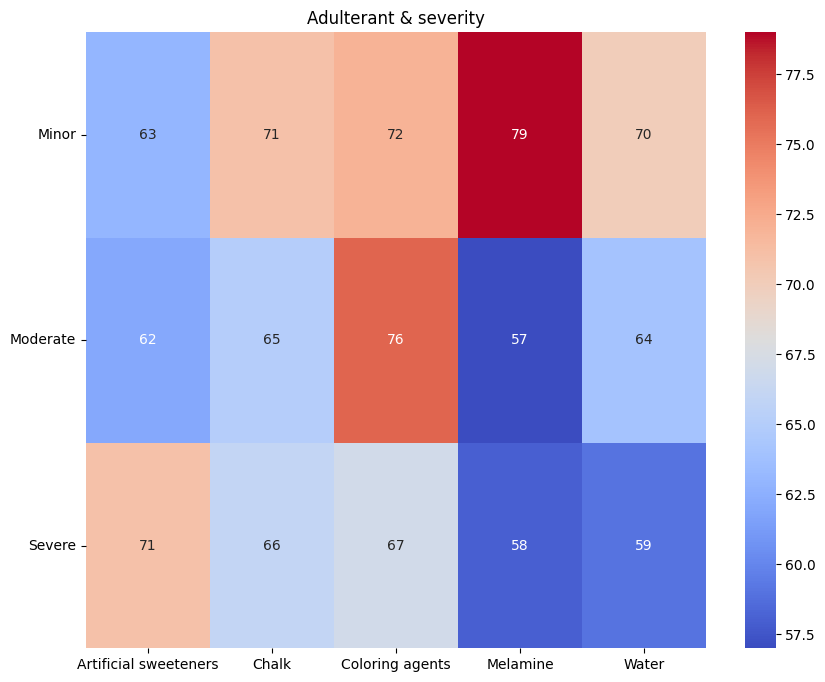

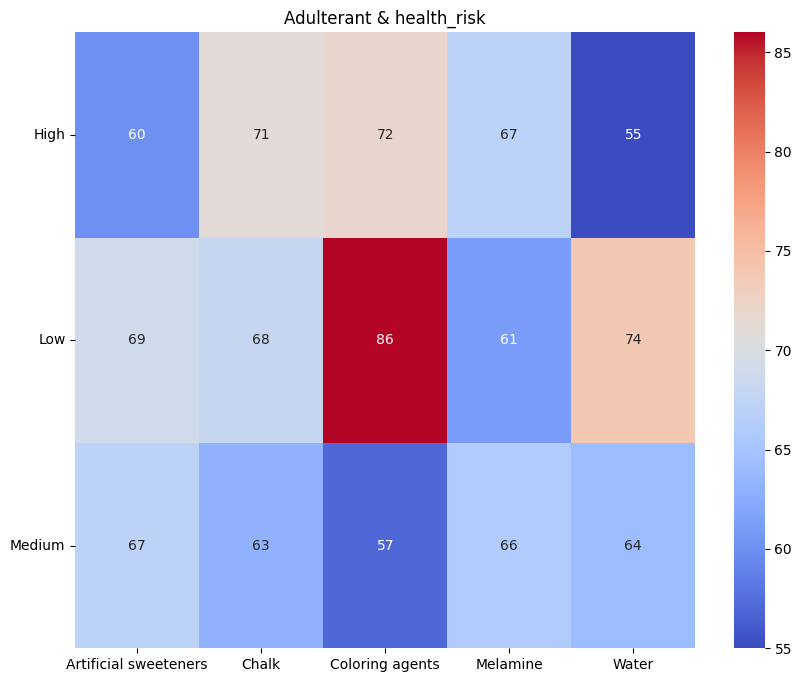

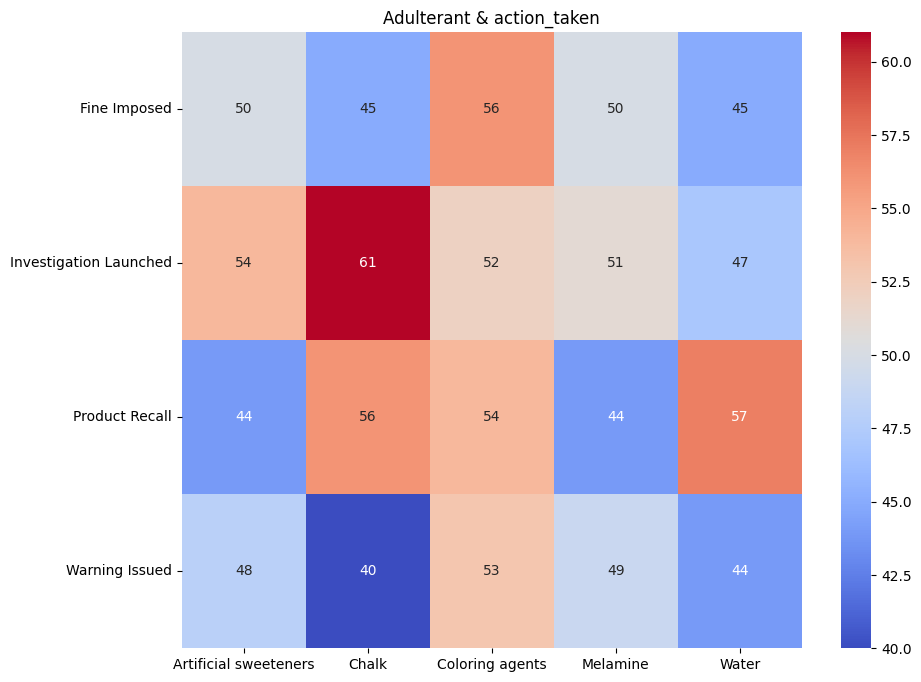

In [7]:
for col in df.drop(columns=['category', 'adulterant']).columns:
    data = pd.crosstab(df[col], df['adulterant'])
    my_heatmap(f'Adulterant & {col}', data)

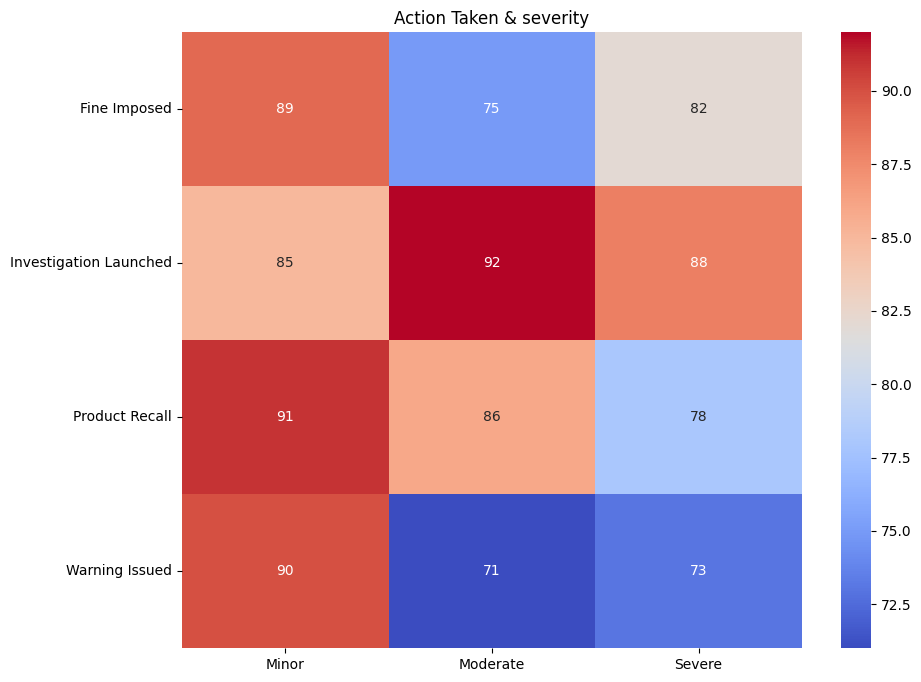

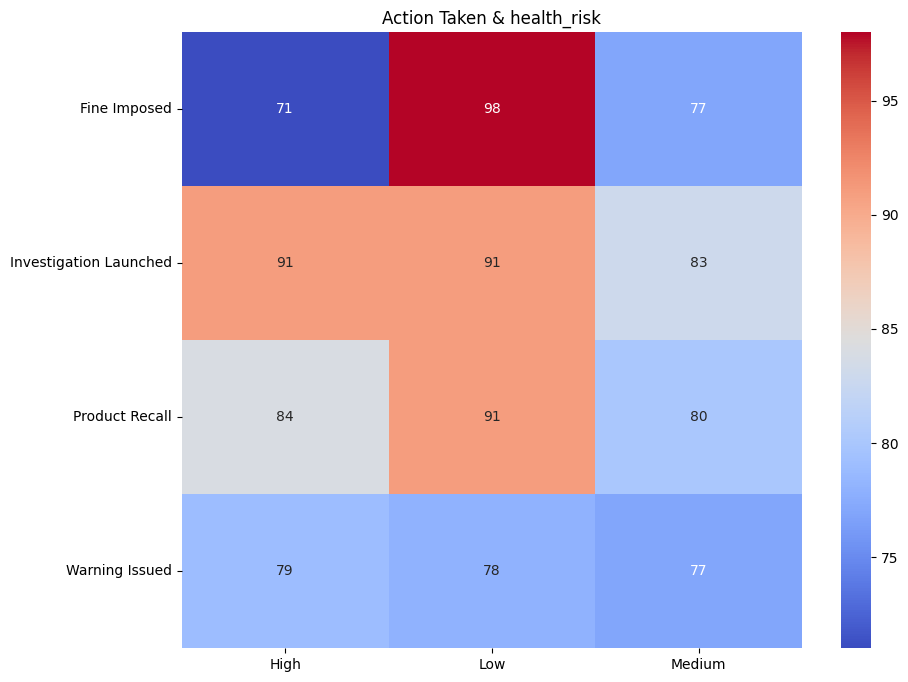

In [8]:
for col in ['severity', 'health_risk']:
    data = pd.crosstab(df['action_taken'], df[col])
    my_heatmap(f'Action Taken & {col}', data)